This is the link for the google drive containing dataset, slides and final report: https://drive.google.com/drive/folders/1vBJCOrjcJ4-9YtyGXzMxjNKvUvTFuOgx?usp=drive_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?id=125j_Ym6mXOVlt-pjFJP9ZZVsn5OBFHsY&export=download' -O star_classification.csv

--2024-04-22 19:50:21--  https://drive.google.com/uc?id=125j_Ym6mXOVlt-pjFJP9ZZVsn5OBFHsY&export=download
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.101, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=125j_Ym6mXOVlt-pjFJP9ZZVsn5OBFHsY&export=download [following]
--2024-04-22 19:50:21--  https://drive.usercontent.google.com/download?id=125j_Ym6mXOVlt-pjFJP9ZZVsn5OBFHsY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15495439 (15M) [application/octet-stream]
Saving to: ‘star_classification.csv’

star_classification 100%[===================>]  14.78M  55.6M

In [ ]:
dataframe= pd.read_csv("/content/star_classification.csv")

In [ ]:
dataframe.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
sns.set(style='darkgrid', palette=['orange', 'green', 'white'])

<Axes: ylabel='count'>

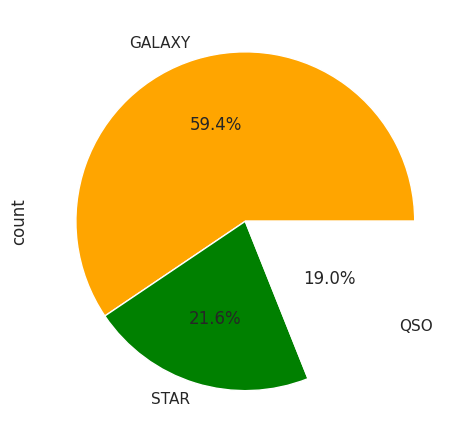

In [ ]:
dataframe['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
numerical_features = [feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(dataframe[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in dataframe.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(dataframe[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 17
Discrete features Count 2
Continuous features Count 15
Categorical features Count 1
Binary Categorical features Count 1


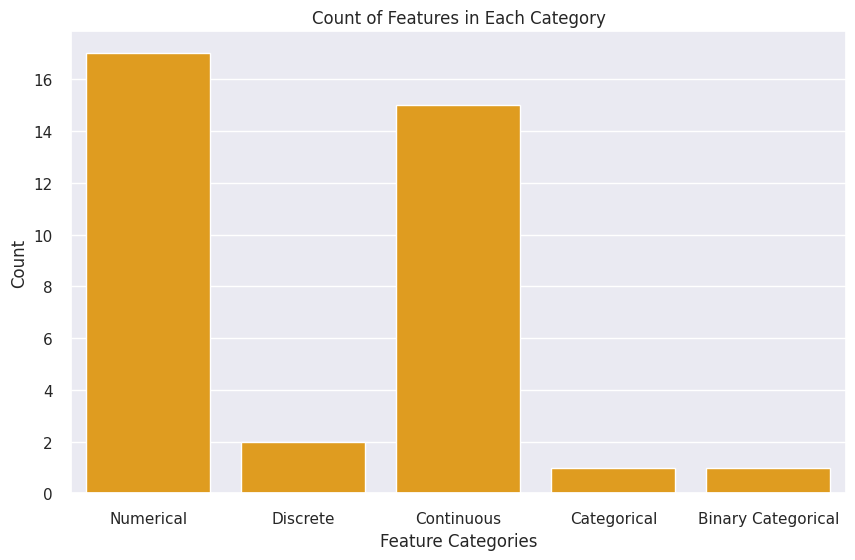

In [ ]:
counts = [len(numerical_features), len(discrete_features), len(continuous_features), len(categorical_features), len(binary_categorical_features)]
categories = ['Numerical', 'Discrete', 'Continuous', 'Categorical', 'Binary Categorical']

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=counts)
plt.title('Count of Features in Each Category')
plt.xlabel('Feature Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
dataframe["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [ ]:
dataframe["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in dataframe["class"]]

In [ ]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(dataframe)

In [ ]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

threshold = -1.5
filtre2 = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre2].index.tolist()

In [ ]:
len(outlier_index)

15256

In [ ]:
dataframe.drop(outlier_index, inplace=True)

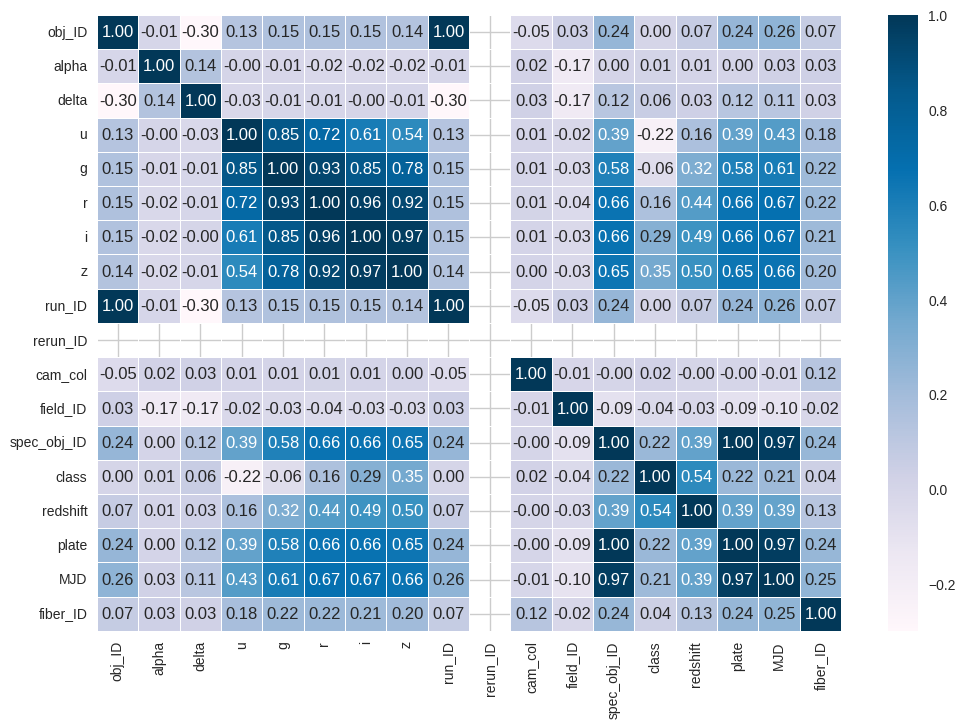

In [ ]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(dataframe.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [ ]:
corr = dataframe.corr()

In [ ]:
corr["class"].sort_values()

u             -0.222802
g             -0.058192
field_ID      -0.037542
run_ID         0.000250
obj_ID         0.000252
alpha          0.008187
cam_col        0.017789
fiber_ID       0.037319
delta          0.058947
r              0.160654
MJD            0.214433
spec_obj_ID    0.224718
plate          0.224718
i              0.294075
z              0.349711
redshift       0.541667
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [ ]:
dataframe = dataframe.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [ ]:
x = dataframe.drop(['class'], axis = 1)
y = dataframe.loc[:,'class'].values
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 50695, 1: 17890, 2: 16159})
Resampled dataset shape Counter({0: 50695, 2: 50695, 1: 50695})


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()

g.fit(x_train,y_train)
b.fit(x_train,y_train)
k.fit(x_train,y_train)
l.fit(x_train,y_train)

predG=g.predict(x_test)
predB=b.predict(x_test)
predK=k.predict(x_test)
predL=l.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
r_forest = RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=10)
g_boosting = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=3)

r_forest.fit(x_train, y_train)
g_boosting.fit(x_train, y_train)

predR_Forest = r_forest.predict(x_test)
predG_Boosting = g_boosting.predict(x_test)

print('Accuracy Scoress:')
print("GaussianNB:       ", accuracy_score(predG,y_test))
print("BernoulliNB:      ", accuracy_score(predB,y_test))
print("KNeighbours:      ", accuracy_score(predK,y_test))
print("LogisticReg:      ", accuracy_score(predL,y_test))
print("RandomForest:     ", accuracy_score(predR_Forest, y_test))
print("GradientBoosting: ", accuracy_score(predG_Boosting, y_test))

Accuracy Scoress:
GaussianNB:        0.9052381996054912
BernoulliNB:       0.6116280459861723
KNeighbours:       0.9583374843093108
LogisticReg:       0.9605291996254159
RandomForest:      0.9723246129629999
GradientBoosting:  0.9759110562075355


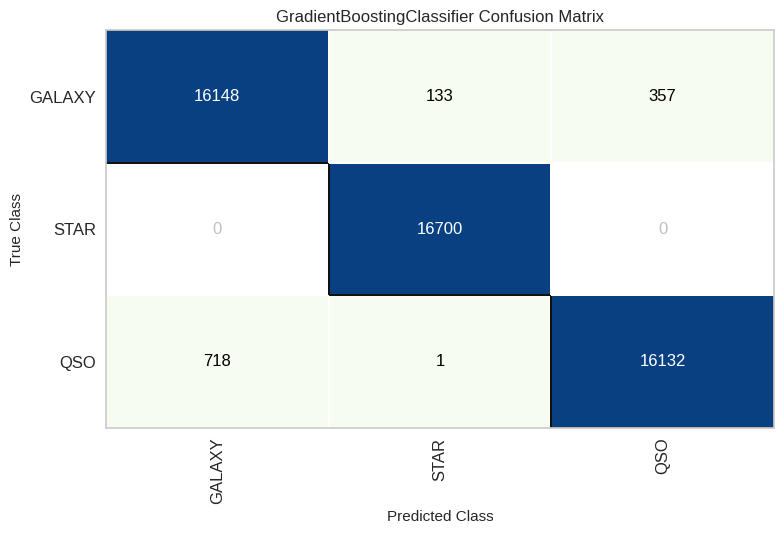

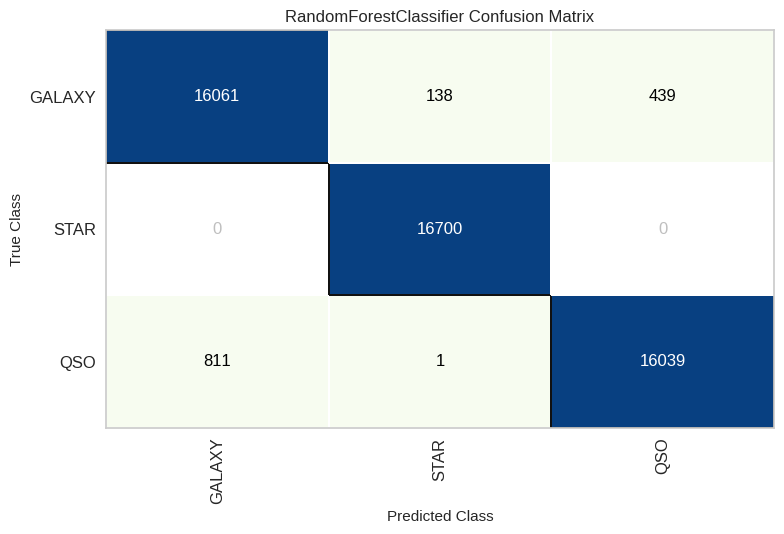

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
classes = ['GALAXY','STAR','QSO']

g_boosting_cm = ConfusionMatrix(g_boosting, classes=classes, cmap='GnBu')

g_boosting_cm.fit(x_train, y_train)
g_boosting_cm.score(x_test, y_test)
g_boosting_cm.show()

r_forest_cm = ConfusionMatrix(r_forest, classes=classes, cmap='GnBu')

r_forest_cm.fit(x_train, y_train)
r_forest_cm.score(x_test, y_test)
r_forest_cm.show()

In [ ]:
print("classification report for Gradient boosting:")
print(classification_report(y_test, predG_Boosting))
print("classification report for Random forest:")
print(classification_report(y_test, predR_Forest))

classification report for Gradient boosting:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     16638
           1       0.99      1.00      1.00     16700
           2       0.98      0.96      0.97     16851

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189

classification report for Random forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     16638
           1       0.99      1.00      1.00     16700
           2       0.97      0.95      0.96     16851

    accuracy                           0.97     50189
   macro avg       0.97      0.97      0.97     50189
weighted avg       0.97      0.97      0.97     50189



#Trying ensemble methods stacking and blending on base models GaussianNB, BernoulliNB, KNeighborsClassifier and LogisticRegression

In [ ]:
# Define functions for ensemble methods
def stacking_ensemble(models, final_model):
    return StackingClassifier(estimators=models, final_estimator=final_model)

def voting_ensemble(models):
    return VotingClassifier(estimators=models)

# Define models for stacking and voting ensemble
models_for_stacking = [
    ('gnb', GaussianNB()),
    ('bnb', BernoulliNB()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

stacking_model = stacking_ensemble(models_for_stacking, RandomForestClassifier())
voting_model = voting_ensemble(models_for_stacking)

X = dataframe.drop("class", axis=1)
y = dataframe["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

stacking_scores = cross_val_score(stacking_model, X_scaled, y, cv=5, scoring='accuracy')
voting_scores = cross_val_score(voting_model, X_scaled, y, cv=5, scoring='accuracy')

print("Stacking Ensemble Cross-Validation Scores:", stacking_scores)
print("Mean Stacking Ensemble Cross-Validation Score:", stacking_scores.mean())
print("Voting Ensemble Cross-Validation Scores:", voting_scores)
print("Mean Voting Ensemble Cross-Validation Score:", voting_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Ensemble Cross-Validation Scores: [0.97138474 0.97232875 0.97191575 0.97280076 0.97126505]
Mean Stacking Ensemble Cross-Validation Score: 0.9719390083786184
Voting Ensemble Cross-Validation Scores: [0.95085256 0.95262257 0.95226857 0.95268157 0.95114468]
Mean Voting Ensemble Cross-Validation Score: 0.9519139907331151


In [ ]:
X_train_base, X_blend, y_train_base, y_blend = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

base_models = [
    GaussianNB(),
    BernoulliNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
]

predictions = []

for model in base_models:
    model.fit(X_train_base, y_train_base)
    y_pred = model.predict(X_blend)
    predictions.append(y_pred)

blend_X = np.column_stack(predictions)

meta_model = RandomForestClassifier()
meta_model.fit(blend_X, y_blend)

predictions_test = []

for model in base_models:
    y_pred_test = model.predict(x_test)
    predictions_test.append(y_pred_test)

blend_X_test = np.column_stack(predictions_test)

blend_predictions = meta_model.predict(blend_X_test)

blend_accuracy = accuracy_score(y_test, blend_predictions)
print("Blending Ensemble Accuracy:", blend_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Blending Ensemble Accuracy: 0.9756321106218494


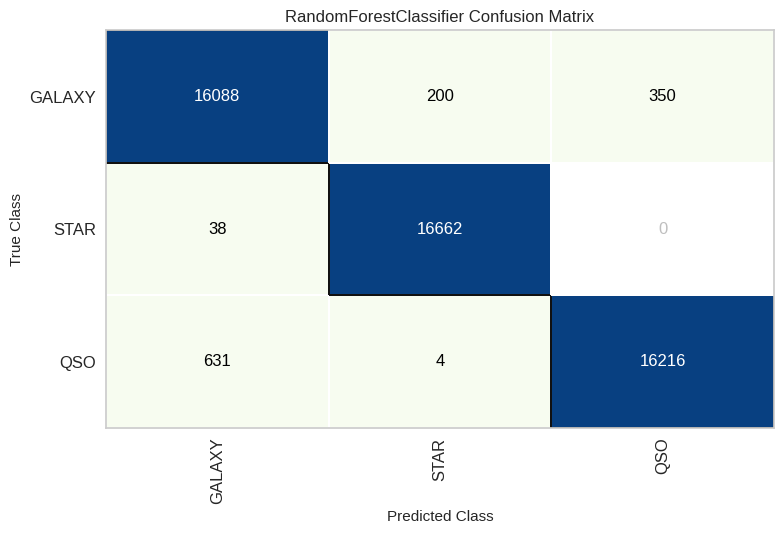

classification report for Blend ensemble:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     16638
           1       0.99      1.00      0.99     16700
           2       0.98      0.96      0.97     16851

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



In [ ]:
b_ensemble_cm = ConfusionMatrix(meta_model, classes=classes, cmap='GnBu')

b_ensemble_cm.fit(blend_X, y_blend)
b_ensemble_cm.score(blend_X_test, y_test)
b_ensemble_cm.show()

print("classification report for Blend ensemble:")
print(classification_report(y_test, blend_predictions))

# Finding the best combination of hyperparameters for Gradient Boosting using Randomized Search

In [ ]:
g_boosting_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

g_boosting_random_search = RandomizedSearchCV(GradientBoostingClassifier(), g_boosting_param_dist, cv=5, n_iter=10, n_jobs=-1, random_state=42)
g_boosting_random_search.fit(x_train, y_train)
g_boosting_best_params = g_boosting_random_search.best_params_
print("Best Parameters for Gradient Boosting:", g_boosting_best_params)

Best Parameters for Gradient Boosting: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


# Finding the best combination of hyperparameters for KNeighbors,LogisticRegression using Randomized Search

For Gaussian Naive Bayes, there are no hyperparameters to tune, and for Bernoulli Naive Bayes, only the alpha parameter is tuned, which has a small search space. Hence no need for Hyperparamter search

In [ ]:
k_param_dist = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

l_param_dist = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100]
}

k_random_search = RandomizedSearchCV(KNeighborsClassifier(), k_param_dist, cv=5, n_iter=10, n_jobs=-1, random_state=42)
k_random_search.fit(x_train, y_train)
k_best_params = k_random_search.best_params_
print("Best Parameters for K Neighbors Classifier:", k_best_params)

l_random_search = RandomizedSearchCV(LogisticRegression(), l_param_dist, cv=5, n_iter=10, n_jobs=-1, random_state=42)
l_random_search.fit(x_train, y_train)
l_best_params = l_random_search.best_params_
print("Best Parameters for Logistic Regression:", l_best_params)

Best Parameters for K Neighbors Classifier: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Logistic Regression: {'solver': 'lbfgs', 'max_iter': 100, 'C': 10.0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Finding the best combination of hyperparameters for Random Forrest using Randomized Search

In [ ]:
r_forest_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

r_forest_random_search = RandomizedSearchCV(RandomForestClassifier(), r_forest_param_dist, cv=5, n_iter=10, n_jobs=-1, random_state=42)
r_forest_random_search.fit(x_train, y_train)
r_forest_best_params = r_forest_random_search.best_params_
print("Best Parameters for Random Forest:", r_forest_best_params)

Best Parameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


# Calculating accuracies using these respective best combination of hyperparameters for the respective models

In [ ]:
best_k = KNeighborsClassifier(**k_best_params)
best_k.fit(x_train, y_train)
best_k_pred = best_k.predict(x_test)
best_k_accuracy = accuracy_score(y_test, best_k_pred)
print("Accuracy for K Neighbors Classifier:", best_k_accuracy)

best_l = LogisticRegression(**l_best_params)
best_l.fit(x_train, y_train)
best_l_pred = best_l.predict(x_test)
best_l_accuracy = accuracy_score(y_test, best_l_pred)
print("Accuracy for Logistic Regression:", best_l_accuracy)

best_g_boosting = GradientBoostingClassifier(**g_boosting_best_params)
best_g_boosting.fit(x_train, y_train)
best_g_boosting_pred = best_g_boosting.predict(x_test)
best_g_boosting_accuracy = accuracy_score(y_test, best_g_boosting_pred)
print("Accuracy for Gradient Boosting:", best_g_boosting_accuracy)

best_r_forest = RandomForestClassifier(**r_forest_best_params)
best_r_forest.fit(x_train, y_train)
best_r_forest_pred = best_r_forest.predict(x_test)
best_r_forest_accuracy = accuracy_score(y_test, best_r_forest_pred)
print("Accuracy for Random Forest Classifier:", best_r_forest_accuracy)


Accuracy for K Neighbors Classifier: 0.9635179023291957


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression: 0.964932554942318
Accuracy for Gradient Boosting: 0.9827252983721533
Accuracy for Random Forest Classifier: 0.983940704138357


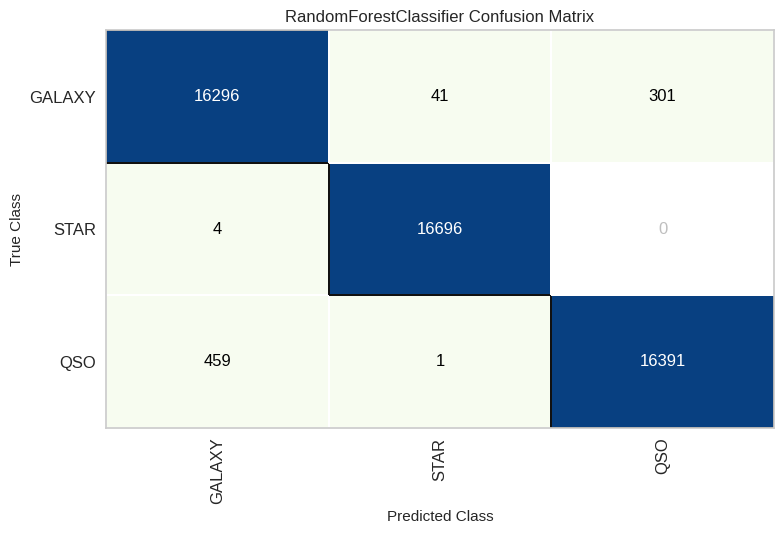

classification report for Random forest with best parameters:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16638
           1       1.00      1.00      1.00     16700
           2       0.98      0.97      0.98     16851

    accuracy                           0.98     50189
   macro avg       0.98      0.98      0.98     50189
weighted avg       0.98      0.98      0.98     50189



In [ ]:
best_r_forest_cm = ConfusionMatrix(best_r_forest, classes=classes, cmap='GnBu')

best_r_forest_cm.fit(x_train, y_train)
best_r_forest_cm.score(x_test, y_test)
best_r_forest_cm.show()

print("classification report for Random forest with best parameters:")
print(classification_report(y_test, best_r_forest_pred))

In [ ]:
print("Accuracy for K Neighbors Classifier:", best_k_accuracy)
print("Accuracy for Logistic Regression:", best_l_accuracy)
print("Accuracy for Gradient Boosting:", best_g_boosting_accuracy)
print("Accuracy for Random Forest Classifier:", best_r_forest_accuracy)

Accuracy for K Neighbors Classifier: 0.9635179023291957
Accuracy for Logistic Regression: 0.964932554942318
Accuracy for Gradient Boosting: 0.9827252983721533
Accuracy for Random Forest Classifier: 0.983940704138357
